In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/fake_bills.csv', sep=';')

In [ ]:
df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_copy = df.copy()


In [ ]:
df_copy['is_genuine'].values

array([ True,  True,  True, ..., False, False, False])

In [ ]:
label_encoder = LabelEncoder()


In [ ]:
df_copy['is_genuine'] = label_encoder.fit_transform(df['is_genuine'])
df_copy['is_genuine']

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int64

In [ ]:
missing_values=df.isnull().sum()
print(missing_values)

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


In [ ]:
imputer=SimpleImputer(strategy='constant', fill_value=0)
df_copy.iloc[:,:]=imputer.fit_transform(df_copy)

In [ ]:
df_copy['margin_low'].isnull().sum()

0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X_train_initial, X_test, y_train_initial, y_test = train_test_split(
    df_copy[df_copy.columns[1:]], df_copy['is_genuine'], test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_initial, y_train_initial, test_size=0.125, random_state=42)

f1_scores = []
n_neighbors_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in n_neighbors_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

print(f1_scores)



[0.9895287958115183, 0.9947368421052631, 0.9921671018276762, 0.9921671018276762, 0.9895833333333333, 0.9921671018276762, 0.9921671018276762, 0.9921671018276762, 0.9921671018276762, 0.9921671018276762]


In [ ]:
best_k = max(f1_scores)
max_index = f1_scores.index(best_k)

print(best_k)

0.9947368421052631


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

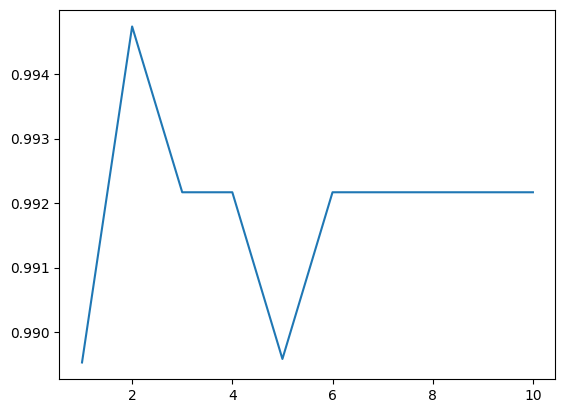

In [ ]:
plt.plot(np.arange(1, 11), f1_scores)
plt.show()

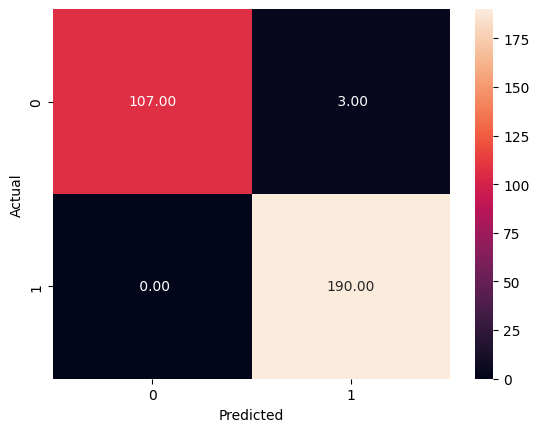

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='5.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()